In [48]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
from datetime import datetime

In [2]:
microsoft_disclosure_dates={
    'MSFT_2018.csv':'2018-08-03',
    'MSFT_2019.csv':'2019-08-01',
    'MSFT_2020.csv':'2020-07-31',
    'MSFT_2021.csv':'2021-07-21',
    'MSFT_2022.csv':'2022-07-28'
}
amazon_disclosure_dates={
    'AMZN_2018.csv':'2018-02-02',
    'AMZN_2019.csv':'2019-02-01',
    'AMZN_2020.csv':'2020-01-31',
    'AMZN_2021.csv':'2021-02-03',
    'AMZN_2022.csv':'2022-02-04'
}
meta_disclosure_dates={
    'META_2018.csv':'2018-02-01',
    'META_2019.csv':'2019-01-31',
    'META_2020.csv':'2020-01-30',
    'META_2021.csv':'2021-01-28',
    'META_2022.csv':'2022-02-03'
}
bk_disclosure_dates={
    'BK_2018.csv':'2018-02-28',
    'BK_2019.csv':'2019-02-27',
    'BK_2020.csv':'2020-02-27',
    'BK_2021.csv':'2021-02-25',
    'BK_2022.csv':'2022-02-25'
}
kc_disclosure_dates={
    'KC_2018.csv':'2018-02-08',
    'KC_2019.csv':'2019-02-07',
    'KC_2020.csv':'2020-02-13',
    'KC_2021.csv':'2021-02-11',
    'KC_2022.csv':'2022-02-10'
}
crocs_disclosure_dates = {
    'Crocs_2018.csv': '2018-03-20',
    'Crocs_2019.csv': '2019-02-28',
    'Crocs_2020.csv': '2020-02-27',
    'Crocs_2021.csv': '2021-02-23',
    'Crocs_2022.csv': '2022-02-16'
}

# LARGE CAP COMPANIES

### MICROSOFT

In [4]:
folder_path_msft= 'Microsoft'
msft_files=glob.glob(os.path.join(folder_path_msft, 'MSFT*.csv'))
msft_files.sort()

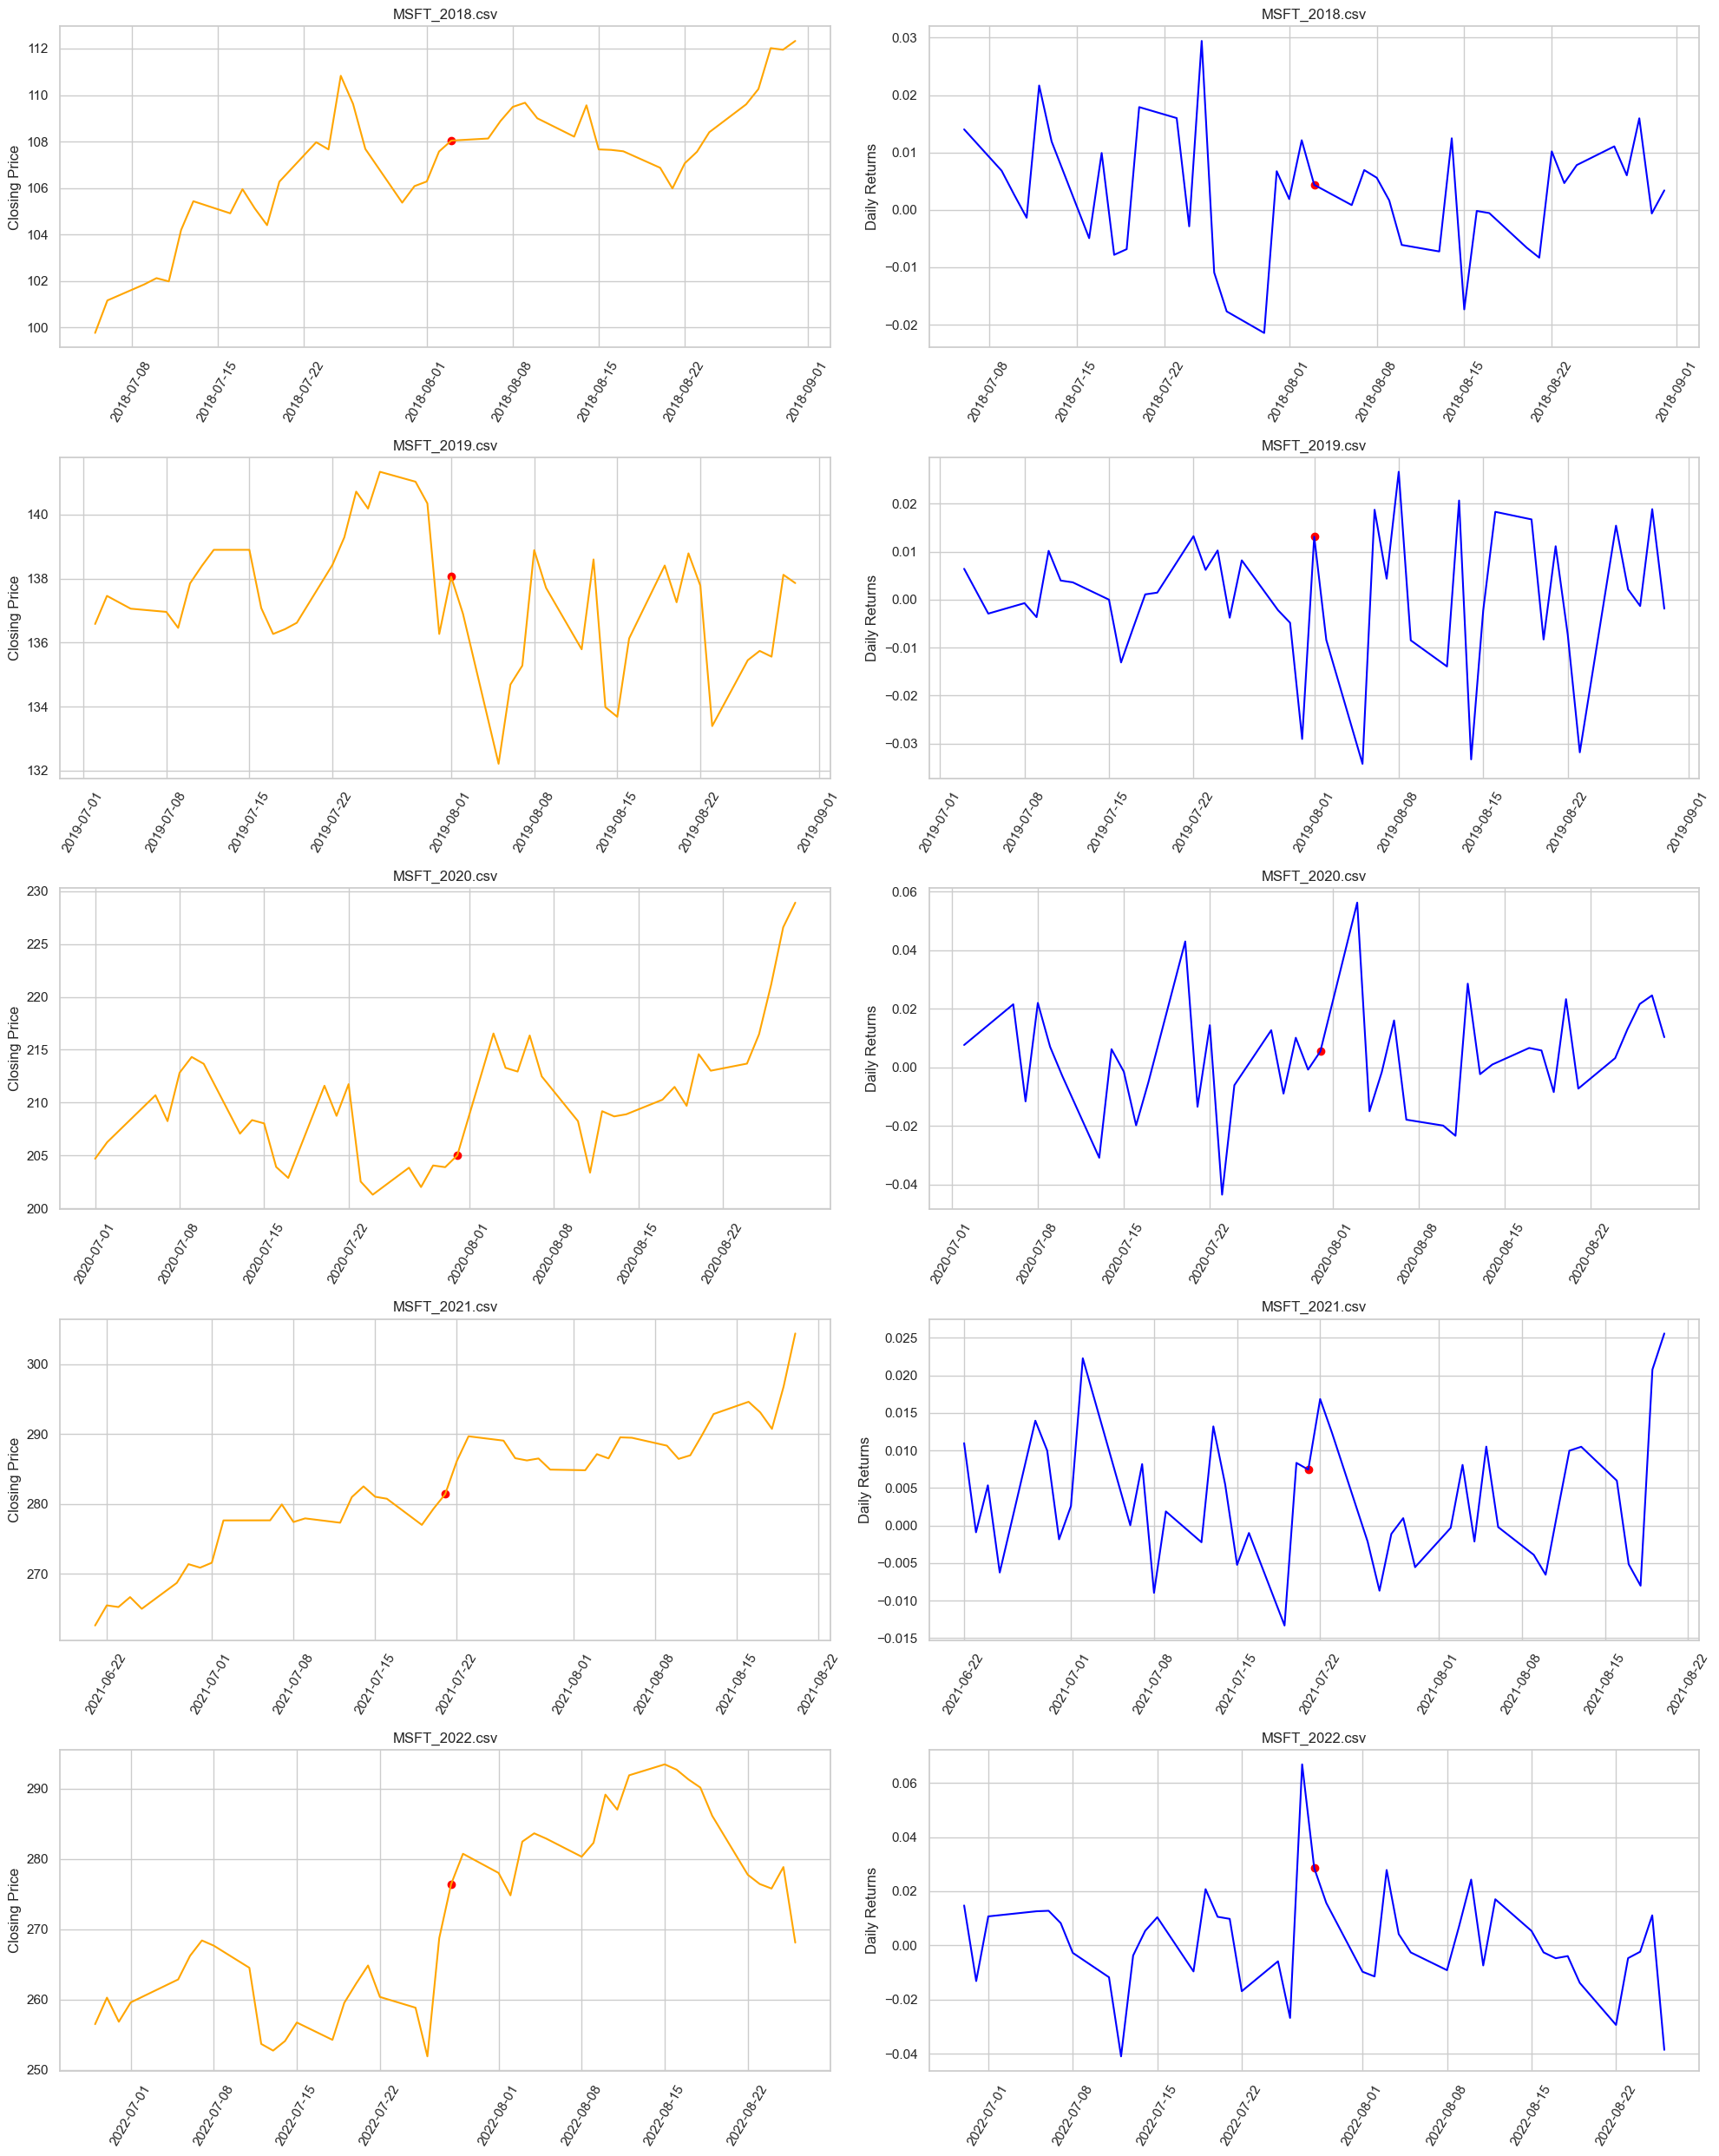

In [54]:
fig, axes = plt.subplots(len(msft_files), 2, figsize=(20, len(msft_files) * 5))

# Loop through files and disclosure dates
for i, (csv_file, d) in enumerate(zip(msft_files, microsoft_disclosure_dates), start=0):
    file_name = os.path.basename(csv_file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    # Drop non-required fields
    df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

    # Convert the 'Date' column to datetime format and create a new column 'Daily Returns'
    df['Date'] = pd.to_datetime(df['Date'])

    df['Daily_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

    # Plot Closing Price
    sns.lineplot(x='Date', y='Close', data=df, color='orange', ax=axes[i, 0])
    axes[i, 0].scatter(pd.to_datetime(microsoft_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(microsoft_disclosure_dates[d]), 'Close'], color='red', label='Disclosure Date')
    axes[i, 0].set_xlabel("")  # Remove x-axis label
    axes[i, 0].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 0].set_ylabel("Closing Price")
    axes[i, 0].legend().set_visible(False)  # Hide legend
    axes[i, 0].set_title(f'{file_name}')

    # Plot Daily Returns
    sns.lineplot(x='Date', y='Daily_Returns', data=df, color='blue', ax=axes[i, 1])
    axes[i, 1].scatter(pd.to_datetime(microsoft_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(microsoft_disclosure_dates[d]), 'Daily_Returns'], color='red', label='Disclosure Date')
    axes[i, 1].set_xlabel("")  # Remove x-axis label
    axes[i, 1].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 1].set_ylabel("Daily Returns")
    axes[i, 1].legend().set_visible(False)  # Hide legend
    axes[i, 1].set_title(f'{file_name}')

plt.tight_layout()
plt.show()



### AMAZON

In [24]:
folder_path_amzn= 'Amazon'
amzn_files=glob.glob(os.path.join(folder_path_amzn, 'AMZN*.csv'))
amzn_files.sort()

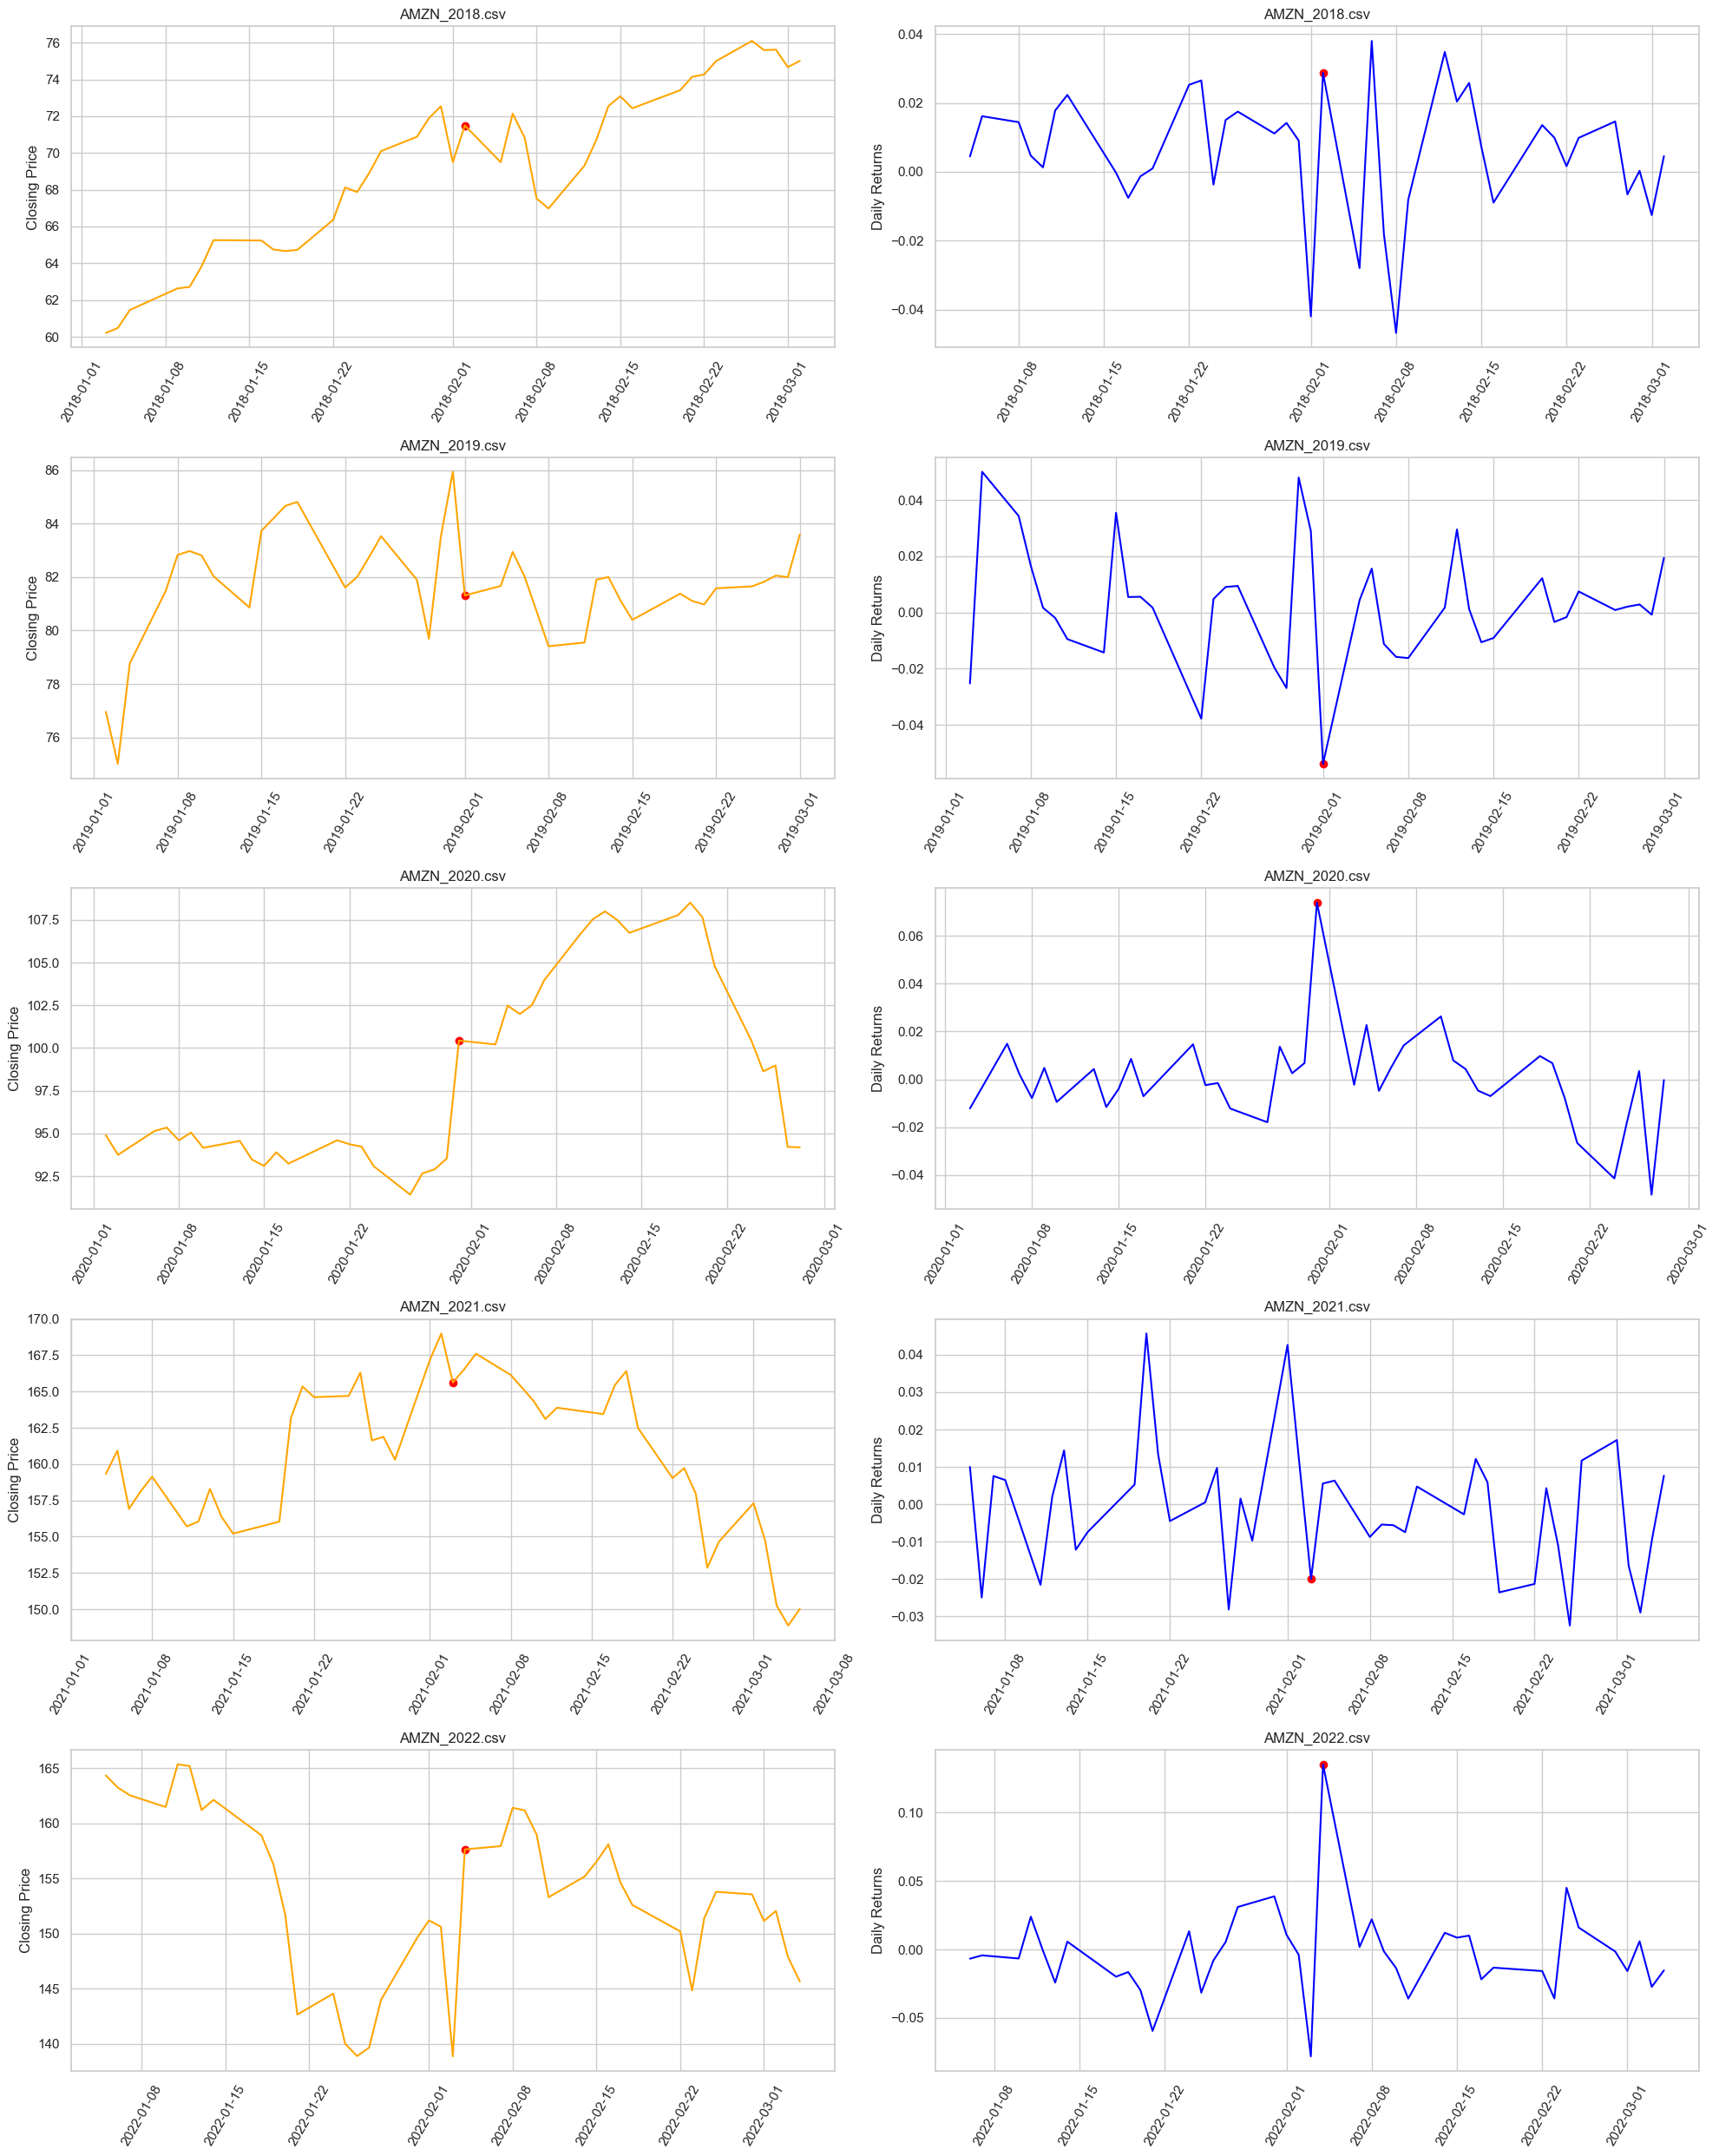

In [55]:
# Create a new figure
fig, axes = plt.subplots(len(amzn_files), 2, figsize=(20, len(amzn_files) * 5))

# Loop through files and disclosure dates
for i, (csv_file, d) in enumerate(zip(amzn_files, amazon_disclosure_dates), start=0):
    file_name = os.path.basename(csv_file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Drop non-required fields
    df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a new column Daily Return
    df['Daily_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

    # Plot Closing Price
    sns.lineplot(x='Date', y='Close', data=df, color='orange', ax=axes[i, 0])
    axes[i, 0].scatter(pd.to_datetime(amazon_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(amazon_disclosure_dates[d]), 'Close'], color='red', label='Disclosure Date')
    axes[i, 0].set_xlabel("")  # Remove x-axis label
    axes[i, 0].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 0].set_ylabel("Closing Price")
    axes[i, 0].legend().set_visible(False)  # Hide legend
    axes[i, 0].set_title(f'{file_name}')

    # Plot Daily Returns
    sns.lineplot(x='Date', y='Daily_Returns', data=df, color='blue', ax=axes[i, 1])
    axes[i, 1].scatter(pd.to_datetime(amazon_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(amazon_disclosure_dates[d]), 'Daily_Returns'], color='red', label='Disclosure Date')
    axes[i, 1].set_xlabel("")  # Remove x-axis label
    axes[i, 1].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 1].set_ylabel("Daily Returns")
    axes[i, 1].legend().set_visible(False)  # Hide legend
    axes[i, 1].set_title(f'{file_name}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



### META PLATFORMS

In [26]:
folder_path_meta= 'META Platforms'
meta_files=glob.glob(os.path.join(folder_path_meta, 'META*.csv'))
meta_files.sort()

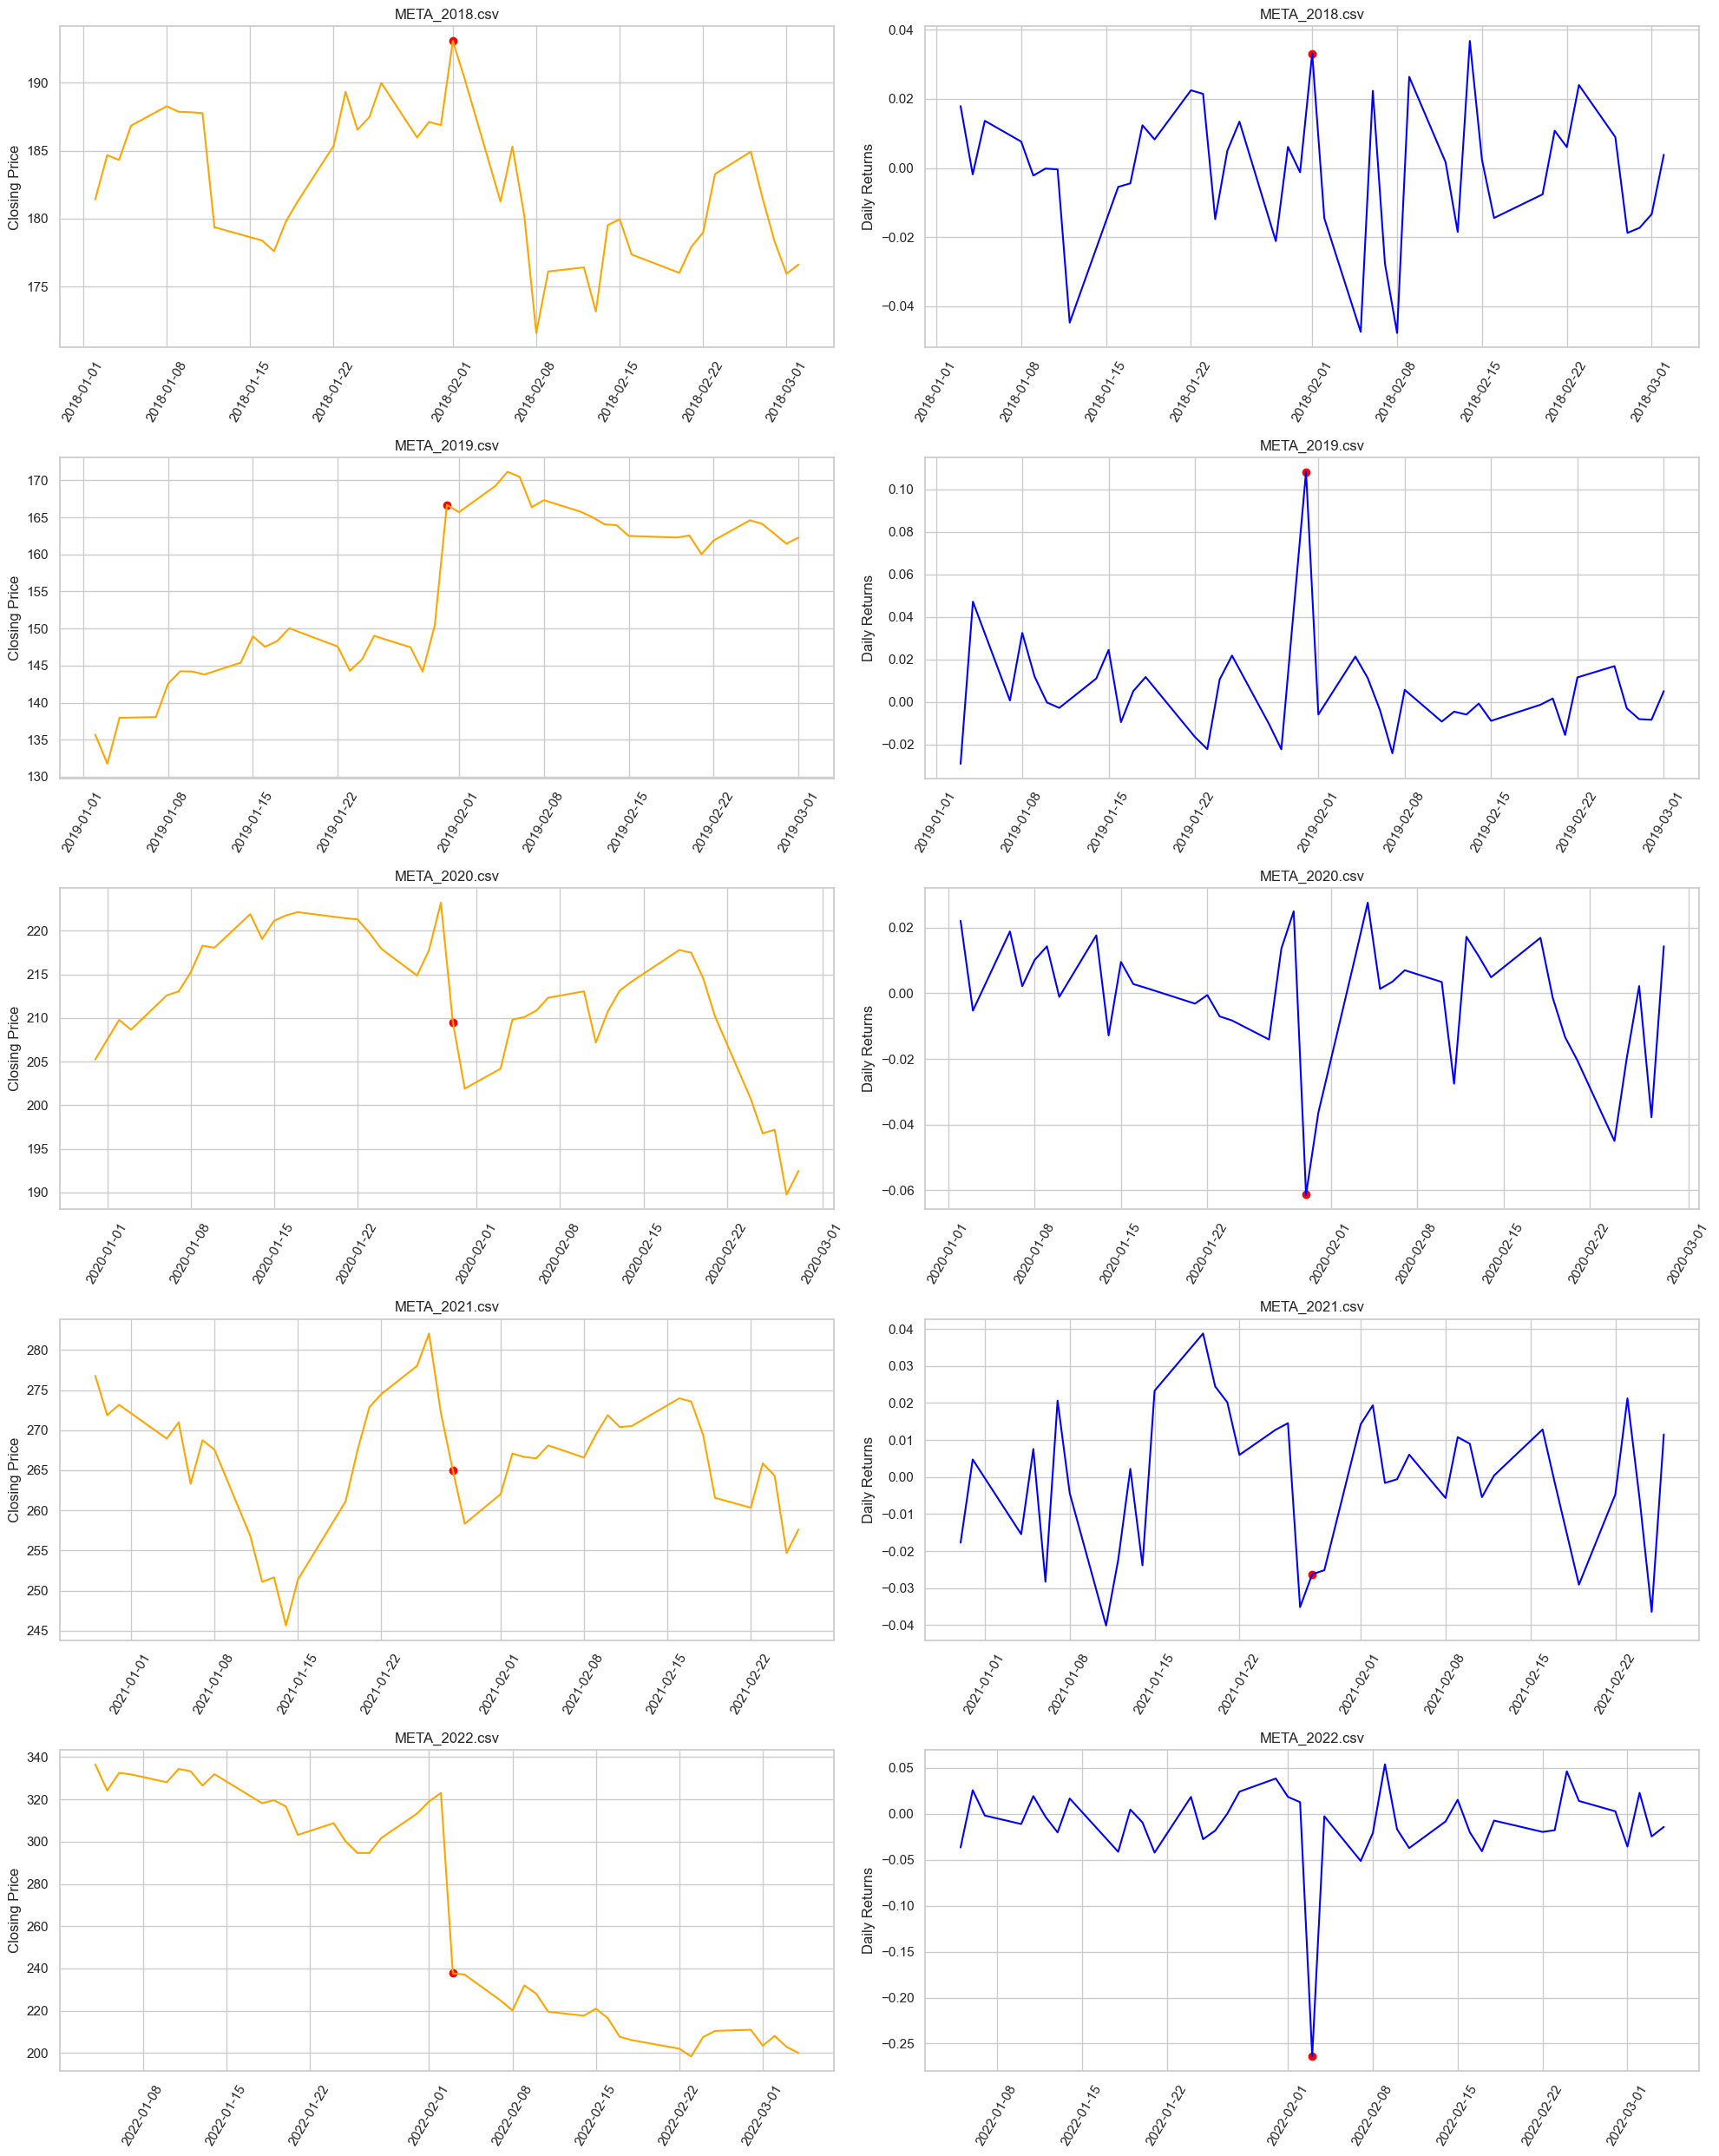

In [56]:
# Create a new figure
fig, axes = plt.subplots(len(meta_files), 2, figsize=(20, len(meta_files) * 5))

# Loop through files and disclosure dates
for i, (csv_file, d) in enumerate(zip(meta_files, meta_disclosure_dates), start=0):
    file_name = os.path.basename(csv_file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Drop non-required fields
    df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a new column Daily Return
    df['Daily_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

    # Plot Closing Price
    sns.lineplot(x='Date', y='Close', data=df, color='orange', ax=axes[i, 0])
    axes[i, 0].scatter(pd.to_datetime(meta_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(meta_disclosure_dates[d]), 'Close'], color='red', label='Disclosure Date')
    axes[i, 0].set_xlabel("")  # Remove x-axis label
    axes[i, 0].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 0].set_ylabel("Closing Price")
    axes[i, 0].legend().set_visible(False)  # Hide legend
    axes[i, 0].set_title(f'{file_name}')

    # Plot Daily Returns
    sns.lineplot(x='Date', y='Daily_Returns', data=df, color='blue', ax=axes[i, 1])
    axes[i, 1].scatter(pd.to_datetime(meta_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(meta_disclosure_dates[d]), 'Daily_Returns'], color='red', label='Disclosure Date')
    axes[i, 1].set_xlabel("")  # Remove x-axis label
    axes[i, 1].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 1].set_ylabel("Daily Returns")
    axes[i, 1].legend().set_visible(False)  # Hide legend
    axes[i, 1].set_title(f'{file_name}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



# MID CAP COMPANIES

### BANK OF NEW YORK MELLON

In [30]:
folder_path_bk= 'Bank of New York Mellon'
bk_files=glob.glob(os.path.join(folder_path_bk, 'BK*.csv'))
bk_files.sort()

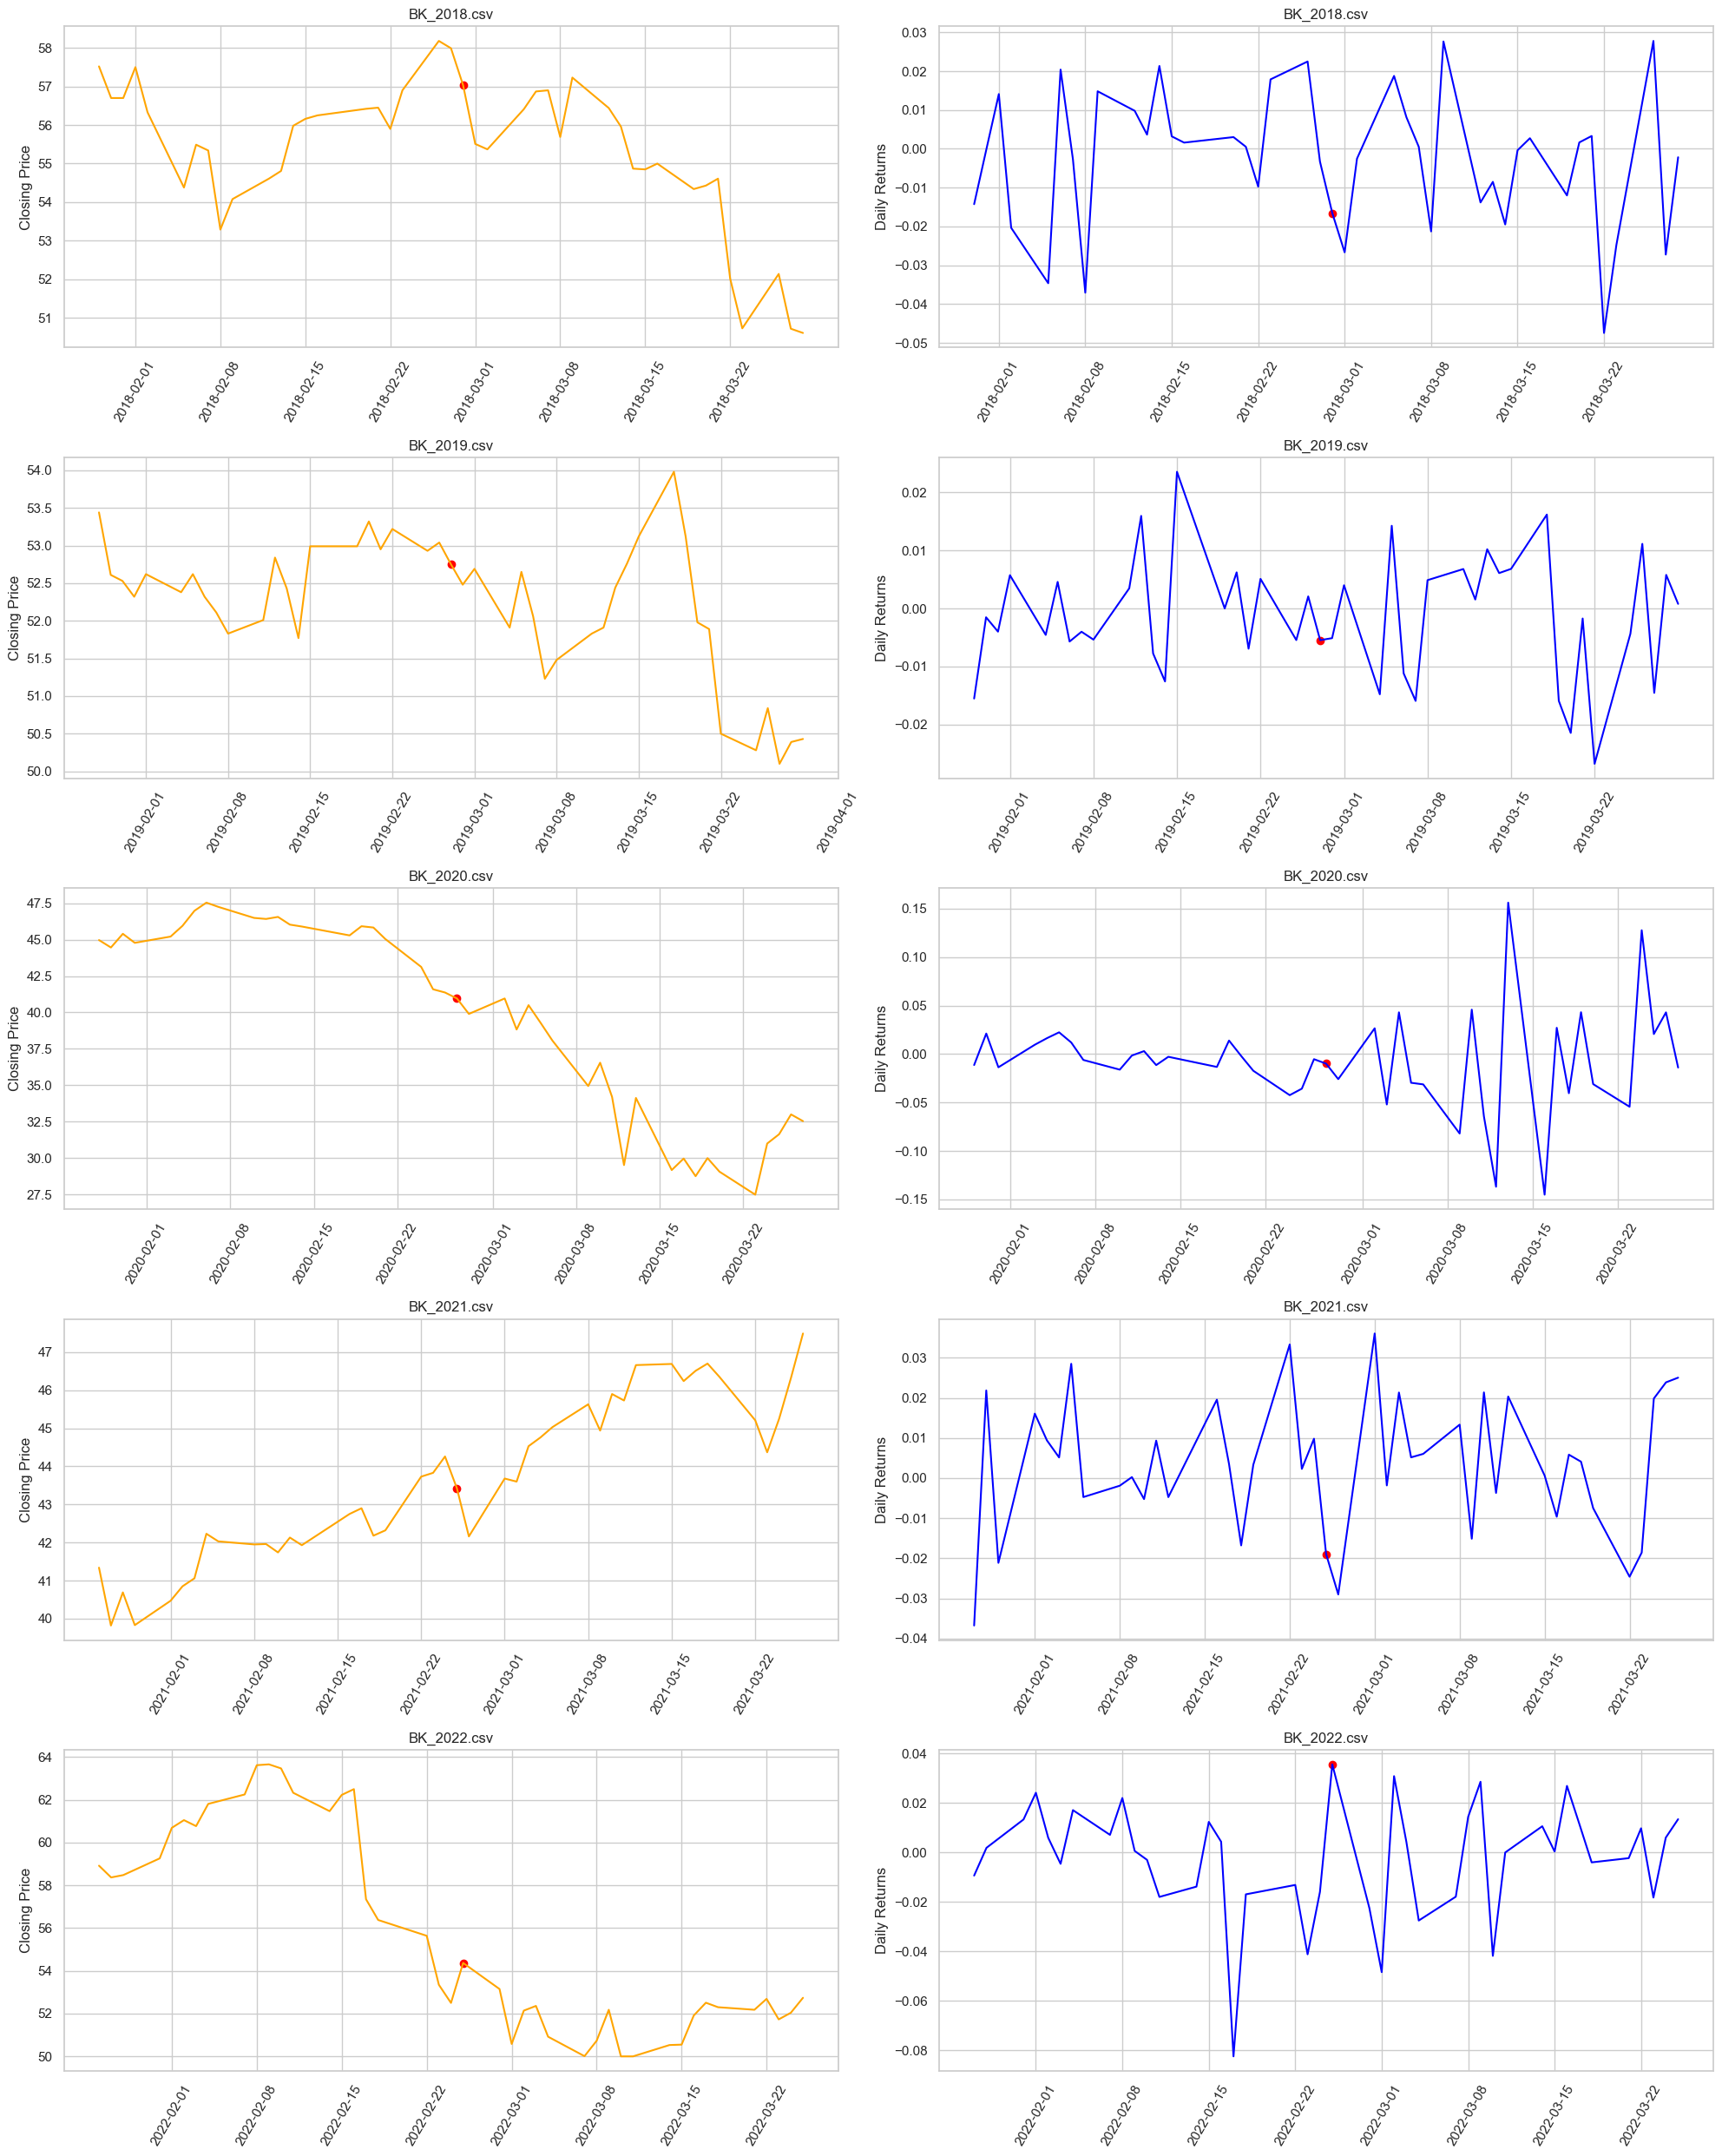

In [57]:
# Create a new figure
fig, axes = plt.subplots(len(bk_files), 2, figsize=(20, len(bk_files) * 5))

# Loop through files and disclosure dates
for i, (csv_file, d) in enumerate(zip(bk_files, bk_disclosure_dates), start=0):
    file_name = os.path.basename(csv_file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Drop non-required fields
    df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a new column Daily Return
    df['Daily_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

    # Plot Closing Price
    sns.lineplot(x='Date', y='Close', data=df, color='orange', ax=axes[i, 0])
    axes[i, 0].scatter(pd.to_datetime(bk_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(bk_disclosure_dates[d]), 'Close'], color='red', label='Disclosure Date')
    axes[i, 0].set_xlabel("")  # Remove x-axis label
    axes[i, 0].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 0].set_ylabel("Closing Price")
    axes[i, 0].legend().set_visible(False)  # Hide legend
    axes[i, 0].set_title(f'{file_name}')

    # Plot Daily Returns
    sns.lineplot(x='Date', y='Daily_Returns', data=df, color='blue', ax=axes[i, 1])
    axes[i, 1].scatter(pd.to_datetime(bk_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(bk_disclosure_dates[d]), 'Daily_Returns'], color='red', label='Disclosure Date')
    axes[i, 1].set_xlabel("")  # Remove x-axis label
    axes[i, 1].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 1].set_ylabel("Daily Returns")
    axes[i, 1].legend().set_visible(False)  # Hide legend
    axes[i, 1].set_title(f'{file_name}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



### KIMBERLY CLARK

In [43]:
folder_path_kc= 'Kimberly Clark'
kc_files=glob.glob(os.path.join(folder_path_kc, 'KC*.csv'))
kc_files.sort()

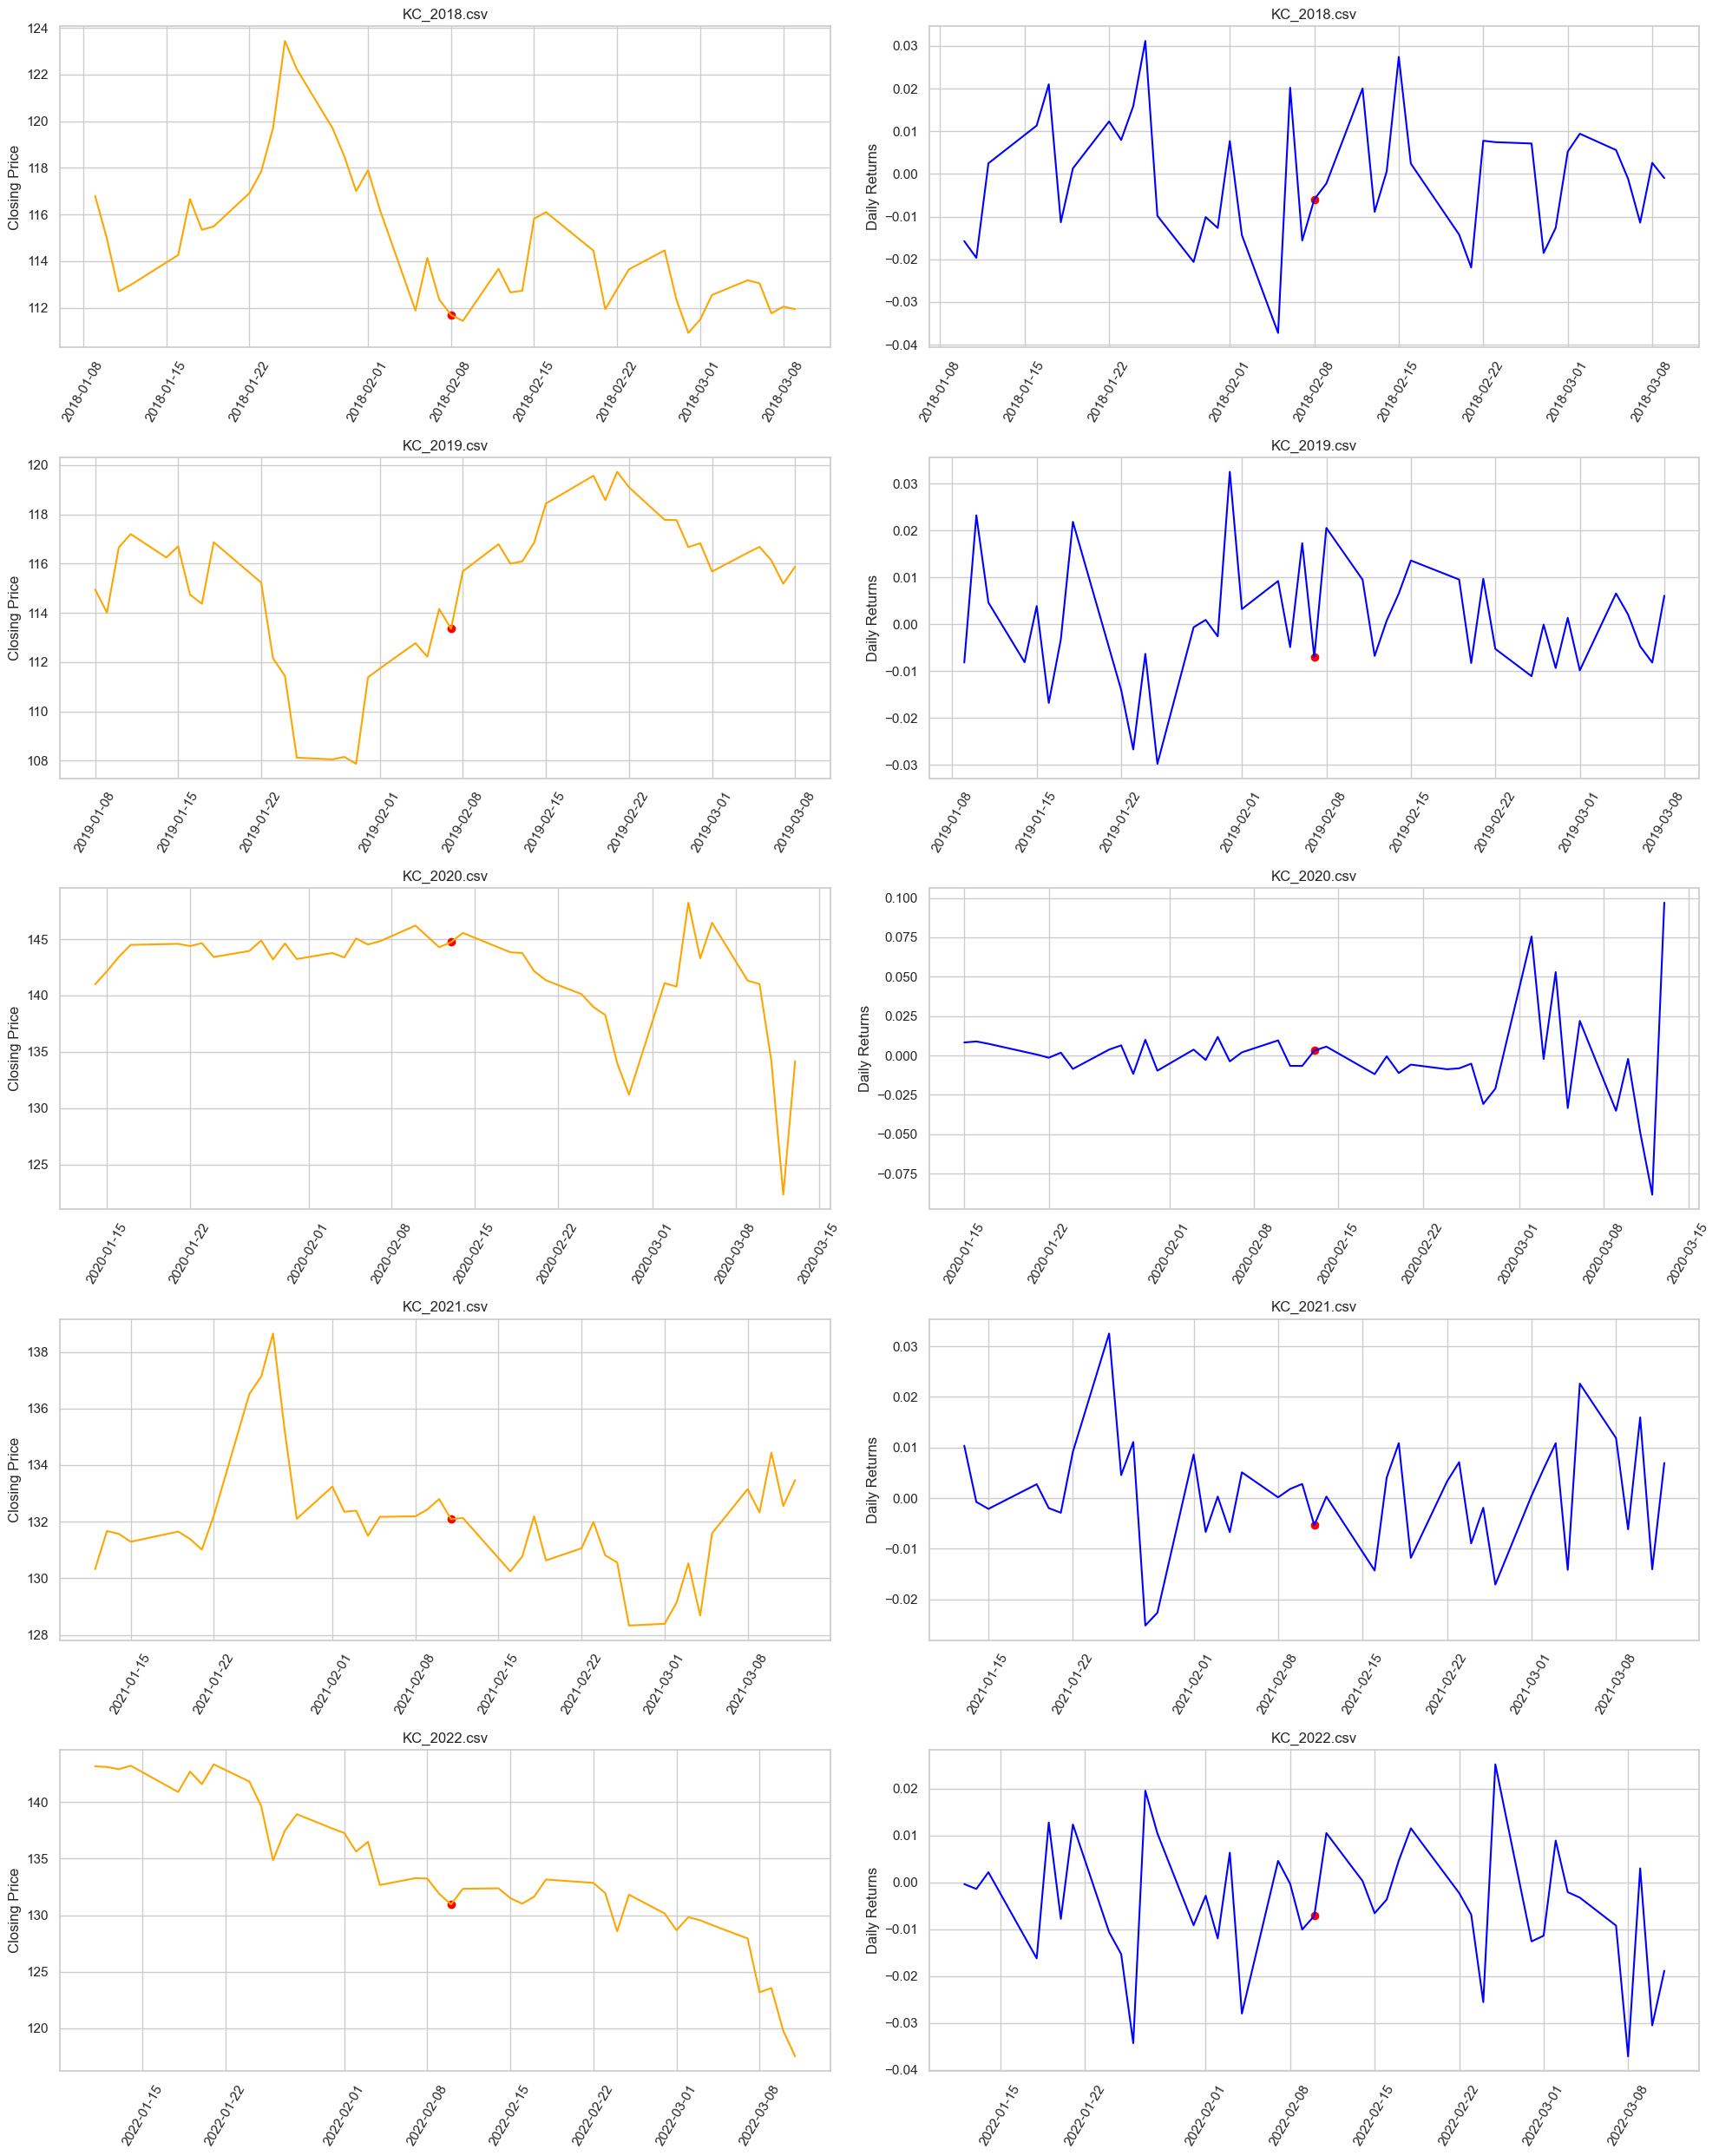

In [58]:
# Create a new figure
fig, axes = plt.subplots(len(kc_files), 2, figsize=(20, len(kc_files) * 5))

# Loop through files and disclosure dates
for i, (csv_file, d) in enumerate(zip(kc_files, kc_disclosure_dates), start=0):
    file_name = os.path.basename(csv_file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Drop non-required fields
    df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a new column Daily Return
    df['Daily_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

    # Plot Closing Price
    sns.lineplot(x='Date', y='Close', data=df, color='orange', ax=axes[i, 0])
    axes[i, 0].scatter(pd.to_datetime(kc_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(kc_disclosure_dates[d]), 'Close'], color='red', label='Disclosure Date')
    axes[i, 0].set_xlabel("")  # Remove x-axis label
    axes[i, 0].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 0].set_ylabel("Closing Price")
    axes[i, 0].legend().set_visible(False)  # Hide legend
    axes[i, 0].set_title(f'{file_name}')

    # Plot Daily Returns
    sns.lineplot(x='Date', y='Daily_Returns', data=df, color='blue', ax=axes[i, 1])
    axes[i, 1].scatter(pd.to_datetime(kc_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(kc_disclosure_dates[d]), 'Daily_Returns'], color='red', label='Disclosure Date')
    axes[i, 1].set_xlabel("")  # Remove x-axis label
    axes[i, 1].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 1].set_ylabel("Daily Returns")
    axes[i, 1].legend().set_visible(False)  # Hide legend
    axes[i, 1].set_title(f'{file_name}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



### CROCS

In [35]:
folder_path = 'Crocs'
crocs_files=glob.glob(os.path.join(folder_path, 'Crocs*.csv'))
crocs_files.sort()

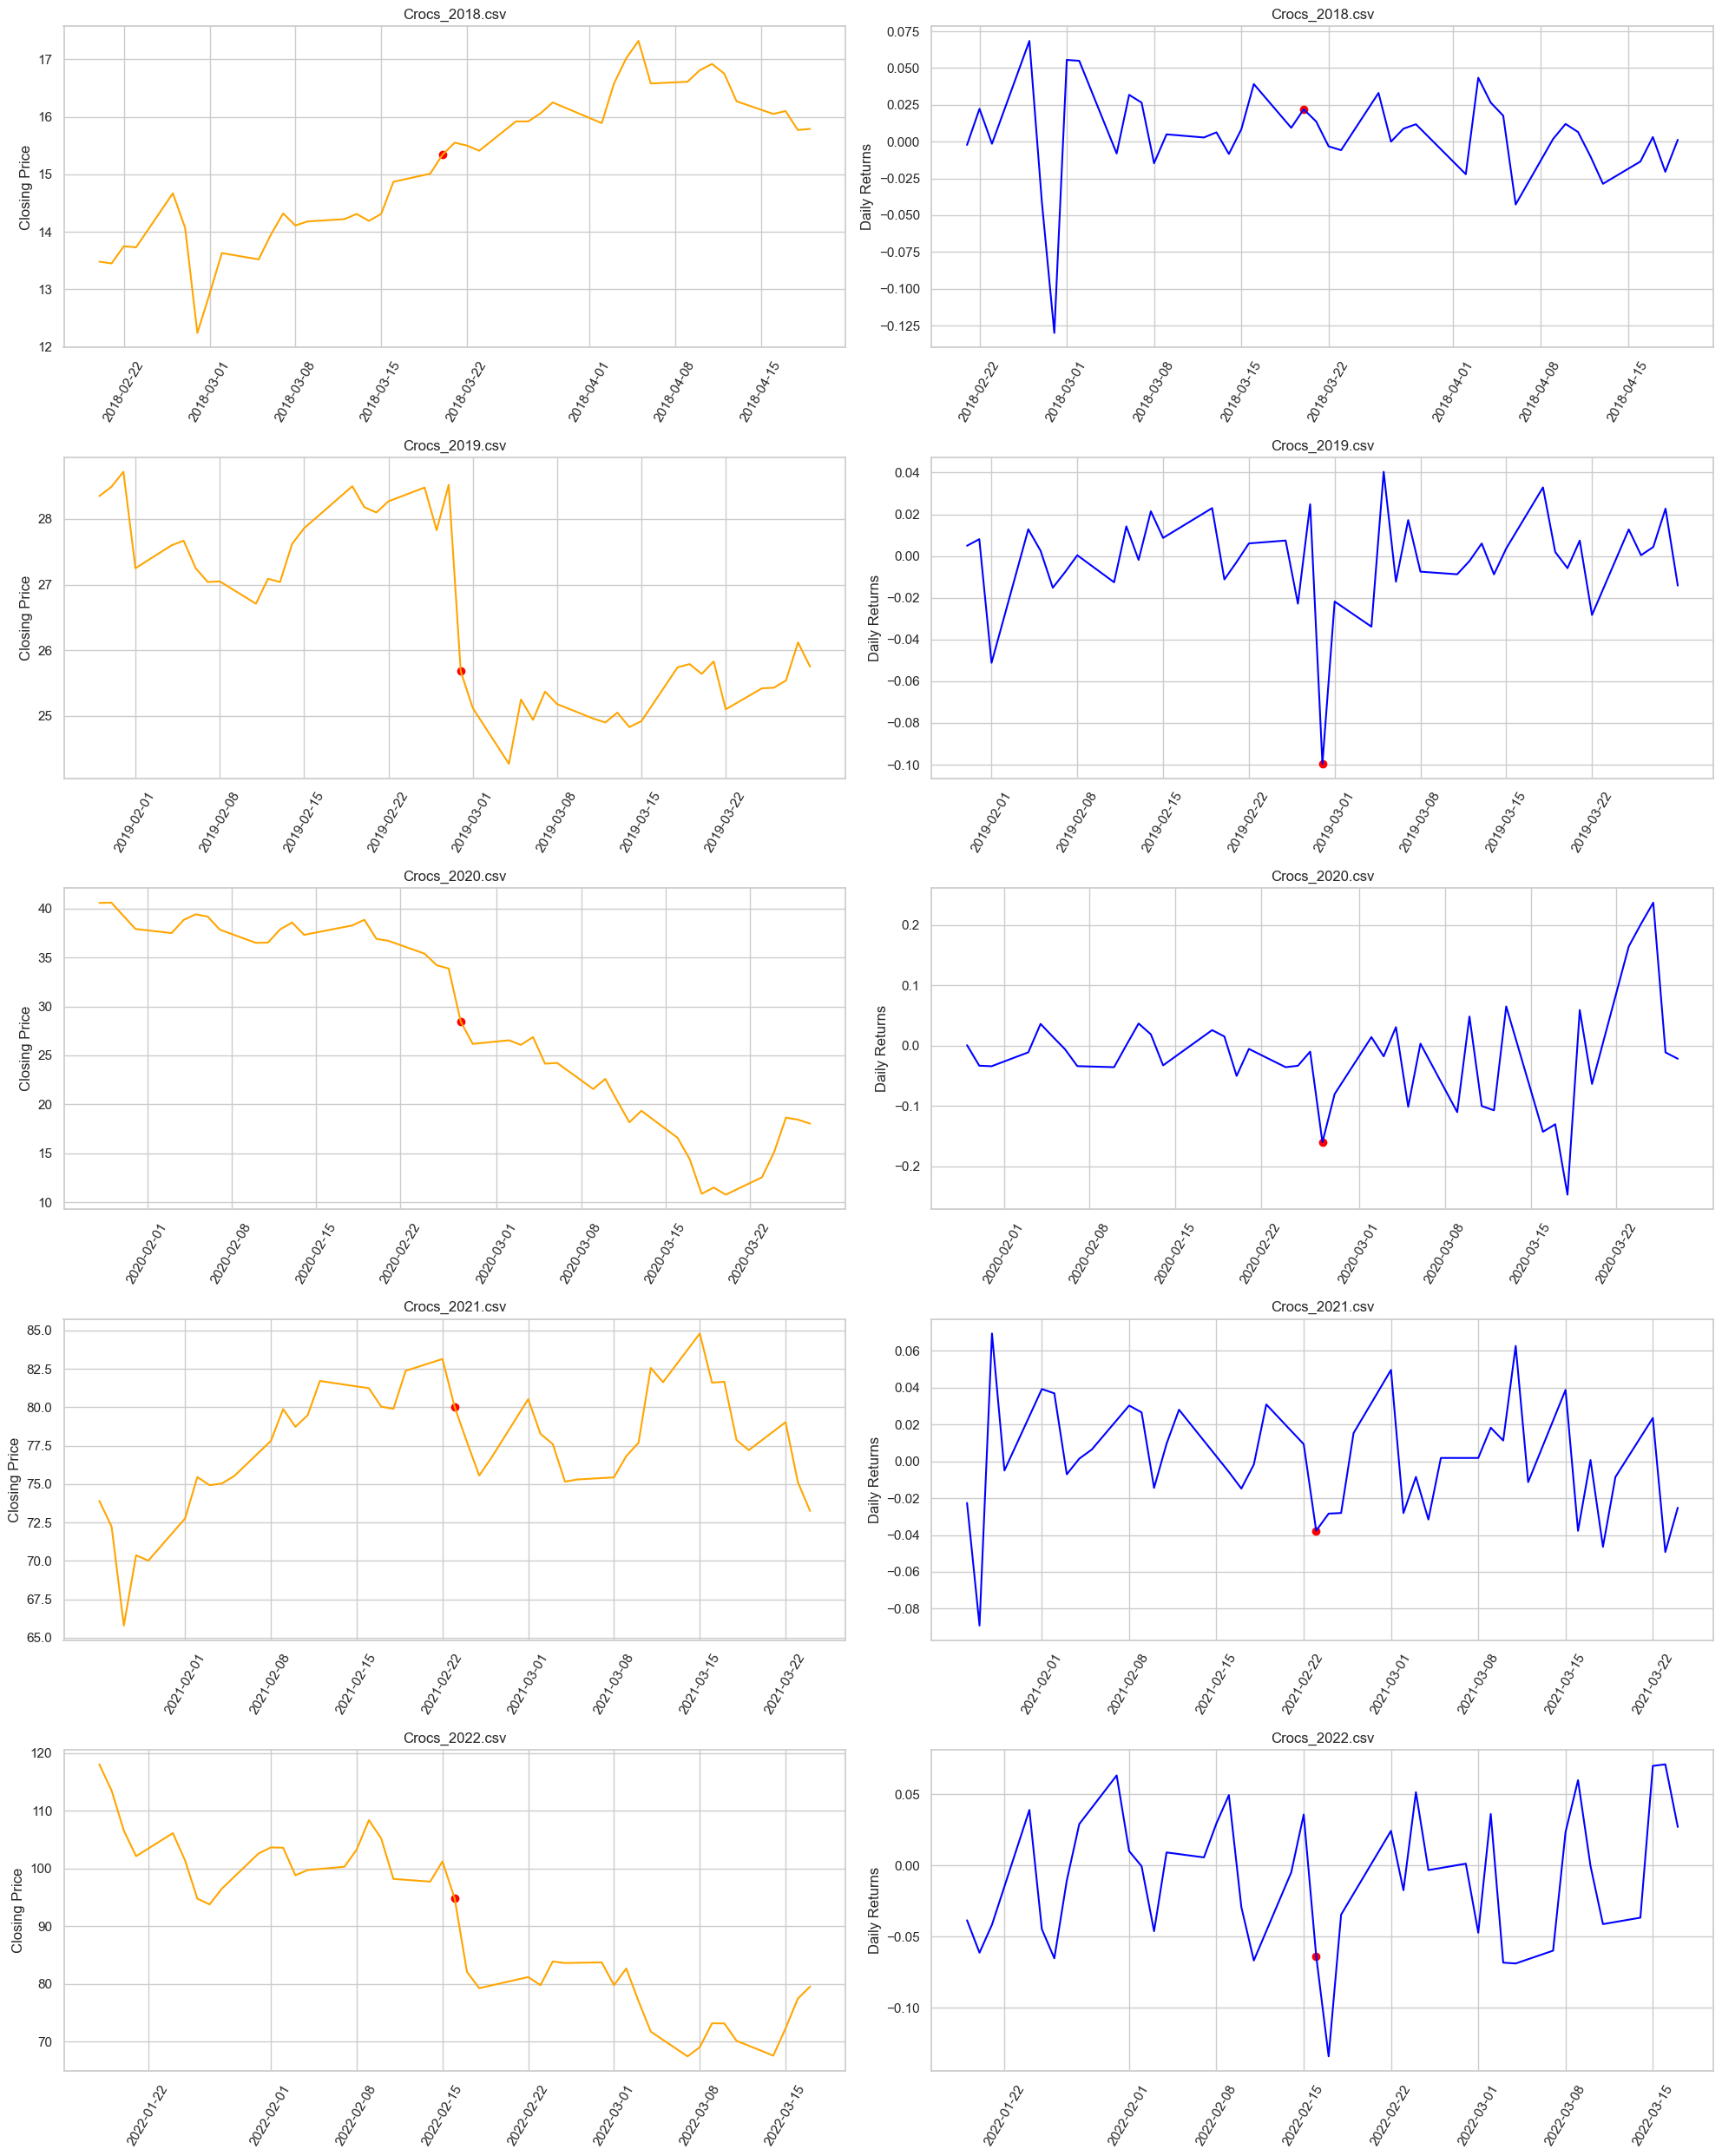

In [59]:
# Create a new figure
fig, axes = plt.subplots(len(crocs_files), 2, figsize=(20, len(crocs_files) * 5))

# Loop through files and disclosure dates
for i, (csv_file, d) in enumerate(zip(crocs_files, crocs_disclosure_dates), start=0):
    file_name = os.path.basename(csv_file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Drop non-required fields
    df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Add a new column Daily Return
    df['Daily_Returns'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

    # Plot Closing Price
    sns.lineplot(x='Date', y='Close', data=df, color='orange', ax=axes[i, 0])
    axes[i, 0].scatter(pd.to_datetime(crocs_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(crocs_disclosure_dates[d]), 'Close'], color='red', label='Disclosure Date')
    axes[i, 0].set_xlabel("")  # Remove x-axis label
    axes[i, 0].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 0].set_ylabel("Closing Price")
    axes[i, 0].legend().set_visible(False)  # Hide legend
    axes[i, 0].set_title(f'{file_name}')

    # Plot Daily Returns
    sns.lineplot(x='Date', y='Daily_Returns', data=df, color='blue', ax=axes[i, 1])
    axes[i, 1].scatter(pd.to_datetime(crocs_disclosure_dates[d]), df.loc[df['Date'] == pd.to_datetime(crocs_disclosure_dates[d]), 'Daily_Returns'], color='red', label='Disclosure Date')
    axes[i, 1].set_xlabel("")  # Remove x-axis label
    axes[i, 1].tick_params(axis='x', rotation=60)  # Rotate x-axis ticks vertically
    axes[i, 1].set_ylabel("Daily Returns")
    axes[i, 1].legend().set_visible(False)  # Hide legend
    axes[i, 1].set_title(f'{file_name}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()